# Bharat Intern - Stock Prediction

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

# Importing the data

In [2]:
train= pd.read_csv('Google_Stock_Price_Train.csv')
test= pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_open= train.iloc[:, 1:2].values

In [5]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [6]:
train_open_scaled[60]

array([0.08627874])

In [7]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [8]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [9]:
xtrain.shape

(1198, 60, 1)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=25)

Epoch 1/25
40/40 [==============================] - 14s 91ms/step - loss: 0.0408
Epoch 2/25
40/40 [==============================] - 3s 85ms/step - loss: 0.0066
Epoch 3/25
40/40 [==============================] - 3s 75ms/step - loss: 0.0054
Epoch 4/25
40/40 [==============================] - 3s 82ms/step - loss: 0.0047
Epoch 5/25
40/40 [==============================] - 3s 79ms/step - loss: 0.0044
Epoch 6/25
40/40 [==============================] - 3s 77ms/step - loss: 0.0045
Epoch 7/25
40/40 [==============================] - 3s 80ms/step - loss: 0.0042
Epoch 8/25
40/40 [==============================] - 3s 84ms/step - loss: 0.0045
Epoch 9/25
40/40 [==============================] - 3s 85ms/step - loss: 0.0042
Epoch 10/25
40/40 [==============================] - 4s 89ms/step - loss: 0.0044
Epoch 11/25
40/40 [==============================] - 4s 91ms/step - loss: 0.0042
Epoch 12/25
40/40 [==============================] - 4s 92ms/step - loss: 0.0042
Epoch 13/25
40/40 [=================

In [12]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [13]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [14]:
xtest= np.array(xtest)

In [15]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 2s 2s/step


In [16]:
predicted_value= ss.inverse_transform(predicted_value)

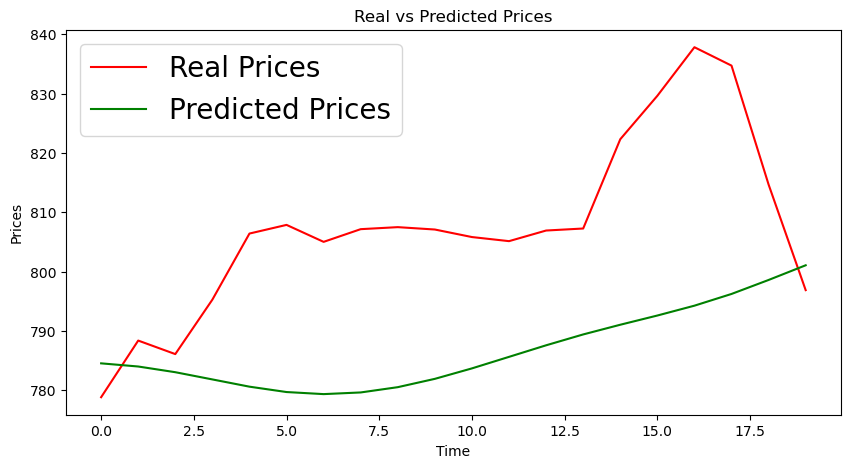

In [17]:
plt.figure(figsize=(10,5))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'green',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [18]:
from keras.wrappers.scikit_learn import KerasRegressor

In [19]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

C:\Users\HP\AppData\Local\Temp\ipykernel_11096\2440103601.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=reg)


In [20]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [20, 10],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/10
20/20 [==============================] - 10s 99ms/step - loss: 0.0446
Epoch 2/10
20/20 [==============================] - 2s 100ms/step - loss: 0.0207
Epoch 3/10
20/20 [==============================] - 2s 99ms/step - loss: 0.0178
Epoch 4/10
20/20 [==============================] - 2s 98ms/step - loss: 0.0137
Epoch 5/10
20/20 [==============================] - 2s 98ms/step - loss: 0.0147
Epoch 6/10
20/20 [==============================] - 2s 96ms/step - loss: 0.0147
Epoch 7/10
20/20 [==============================] - 2s 98ms/step - loss: 0.0109
Epoch 8/10
20/20 [==============================] - 2s 99ms/step - loss: 0.0115
Epoch 9/10
20/20 [==============================] - 2s 106ms/step - loss: 0.0123
Epoch 10/10
5/5 [==============================] - 2s 39ms/step - loss: 8.7431e-04
Epoch 1/10
20/20 [==============================] - 10s 108ms/step - loss: 0.0602
Epoch 2/10
20/20 [==============================] - 2s 106ms/step - loss: 0.0208
Epoch 3/10
20/20 [=============

Epoch 6/20
20/20 [==============================] - 2s 118ms/step - loss: 0.0052
Epoch 7/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0046
Epoch 8/20
20/20 [==============================] - 2s 112ms/step - loss: 0.0053
Epoch 9/20
20/20 [==============================] - 2s 116ms/step - loss: 0.0051
Epoch 10/20
20/20 [==============================] - 2s 118ms/step - loss: 0.0055
Epoch 11/20
20/20 [==============================] - 2s 119ms/step - loss: 0.0053
Epoch 12/20
20/20 [==============================] - 2s 117ms/step - loss: 0.0047
Epoch 13/20
20/20 [==============================] - 2s 120ms/step - loss: 0.0052
Epoch 14/20
20/20 [==============================] - 3s 126ms/step - loss: 0.0046
Epoch 15/20
20/20 [==============================] - 3s 124ms/step - loss: 0.0048
Epoch 16/20
20/20 [==============================] - 2s 115ms/step - loss: 0.0047
Epoch 17/20
20/20 [==============================] - 3s 141ms/step - loss: 0.0043
Epoch 18/20
20/20 [=

30/30 [==============================] - 3s 99ms/step - loss: 0.1865
Epoch 9/20
30/30 [==============================] - 3s 99ms/step - loss: 0.1848
Epoch 10/20
30/30 [==============================] - 3s 98ms/step - loss: 0.1819
Epoch 11/20
30/30 [==============================] - 3s 98ms/step - loss: 0.1805
Epoch 12/20
30/30 [==============================] - 3s 94ms/step - loss: 0.1778
Epoch 13/20
30/30 [==============================] - 3s 92ms/step - loss: 0.1758
Epoch 14/20
30/30 [==============================] - 3s 92ms/step - loss: 0.1726
Epoch 15/20
30/30 [==============================] - 3s 99ms/step - loss: 0.1703
Epoch 16/20
30/30 [==============================] - 3s 96ms/step - loss: 0.1673
Epoch 17/20
30/30 [==============================] - 4s 121ms/step - loss: 0.1646
Epoch 18/20
30/30 [==============================] - 3s 98ms/step - loss: 0.1617
Epoch 19/20
30/30 [==============================] - 3s 96ms/step - loss: 0.1588
Epoch 20/20
8/8 [=======================

In [21]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/20
38/38 [==============================] - 12s 100ms/step - loss: 0.0300
Epoch 2/20
38/38 [==============================] - 4s 100ms/step - loss: 0.0114
Epoch 3/20
38/38 [==============================] - 4s 93ms/step - loss: 0.0105
Epoch 4/20
38/38 [==============================] - 3s 92ms/step - loss: 0.0106
Epoch 5/20
38/38 [==============================] - 4s 96ms/step - loss: 0.0088
Epoch 6/20
38/38 [==============================] - 3s 91ms/step - loss: 0.0097
Epoch 7/20
38/38 [==============================] - 3s 92ms/step - loss: 0.0080
Epoch 8/20
38/38 [==============================] - 3s 91ms/step - loss: 0.0076
Epoch 9/20
38/38 [==============================] - 3s 92ms/step - loss: 0.0072
Epoch 10/20
38/38 [==============================] - 4s 95ms/step - loss: 0.0067
Epoch 11/20
38/38 [==============================] - 4s 101ms/step - loss: 0.0066
Epoch 12/20
38/38 [==============================] - 4s 93ms/step - loss: 0.0060
Epoch 13/20
38/38 [==============

In [22]:
model

1/1 [==============================] - 1s 1s/step


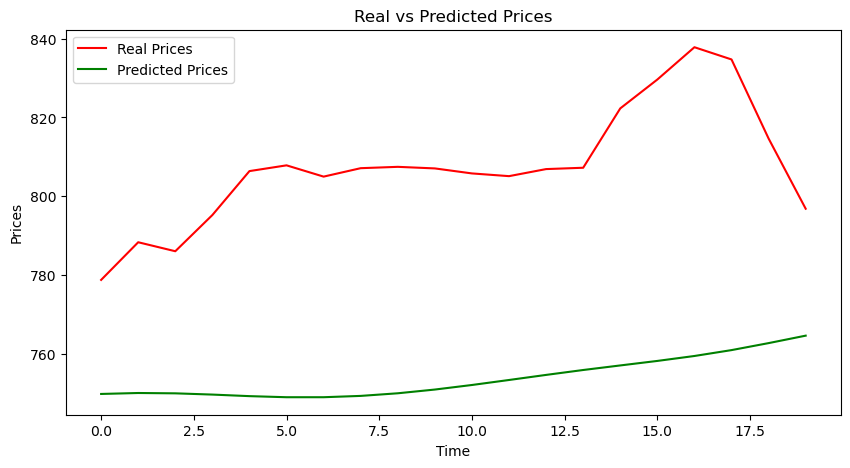

In [23]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(10,5))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'green',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=10)